# Diamonds Prices

In [2]:
import pandas as pd
import pickle 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:/Users/Rama Krishna Veni/Documents/Diamond.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.shape

(53940, 10)

In [9]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
 df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [11]:
df.groupby(['cut']).count()

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


# Encoding categorical columns using LabelEncoding

In [12]:
from sklearn.preprocessing import LabelEncoder
new_df=df.copy()
label_encoder = LabelEncoder()
for col in new_df.select_dtypes(include="object").columns:
   new_df[col]=label_encoder.fit_transform(new_df[col])

In [13]:
new_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [14]:
new_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [15]:
#df. = pd.to_numeric(data.TotalCharges, errors='coerce')

In [16]:
df.shape

(53940, 10)

In [17]:
cor_mat=new_df.corr()
cor_mat

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

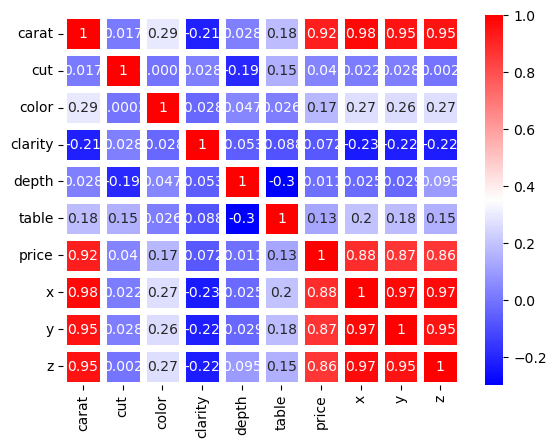

In [18]:
import seaborn as sns
sns.heatmap(cor_mat,annot=True,linewidths=5,cmap='bwr')

In [19]:
y=new_df['price']#dependent variables
x=new_df.drop('price',axis=1)#independent variables

In [20]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [21]:
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


# spliting the data into training and testing

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [23]:
x_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
19497,1.21,2,4,7,61.3,57.0,6.92,6.87,4.23
31229,0.31,2,1,5,62.0,56.0,4.38,4.36,2.71
22311,1.21,2,1,4,62.4,57.0,6.75,6.83,4.24
278,0.81,2,2,3,62.6,55.0,5.92,5.96,3.72
6646,0.79,2,5,7,61.7,56.0,5.94,5.95,3.67


In [24]:
y_train.head()

19497     8131
31229      756
22311    10351
278       2795
6646      4092
Name: price, dtype: int64

In [25]:
y_train.shape,x_train.shape

((37758,), (37758, 9))

In [26]:
y_test.shape,x_test.shape

((16182,), (16182, 9))

# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
ypred=reg.predict(x_test)
ypred

array([ 358.15837605, 3360.36415464, 2142.65550962, ..., 9994.77329602,
       3956.61776935, 1673.76993966])

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.8863641648837631

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,y_test)

1772260.3205072281

In [31]:
results=pd.DataFrame(columns=['price','predicted'])
results['price']=y_test
results['predicted']=ypred
results=results.reset_index()
results['ID']=results.index
results.head()

,index,price,predicted,ID
0,1388,559,358.158376,0
1,50052,2201,3360.364155,1
2,41645,1238,2142.655510,2
3,42377,1304,2374.906700,3
4,17244,6901,10540.654219,4


[]

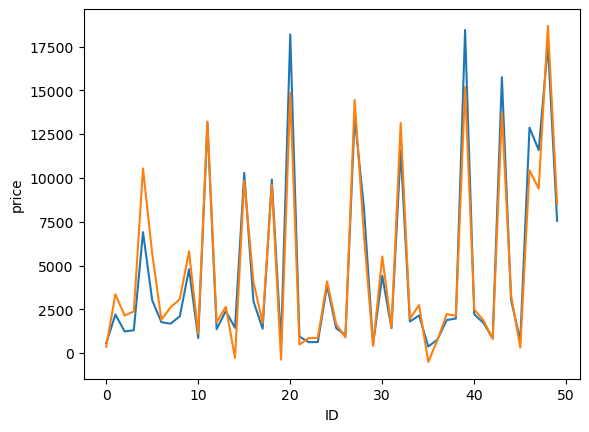

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID',y='price',data=results.head(50))
sns.lineplot(x='ID',y='predicted',data=results.head(50))
plt.plot()

# Elastic Net 

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
elastic_regressor = GridSearchCV(elastic, parameters)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [34]:
elastic_regressor.best_params_

{'alpha': 0.001}

In [35]:
elastic=ElasticNet(alpha=0.001)
elastic.fit(x_train,y_train)
y_pred_elastic=elastic.predict(x_test)

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.8860390184649736

In [37]:
from sklearn.metrics import mean_squared_error
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

1777331.292140309

In [38]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_elastic
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,1388,559,277.467390,0
1,50052,2201,3396.953749,1
2,41645,1238,2140.403568,2
3,42377,1304,2381.059992,3
4,17244,6901,10511.043833,4
5,1608,3011,5705.228841,5
6,46398,1765,1922.576132,6
7,45493,1679,2631.727645,7
8,49385,2102,3117.355213,8
9,10460,4789,5852.890118,9


[]

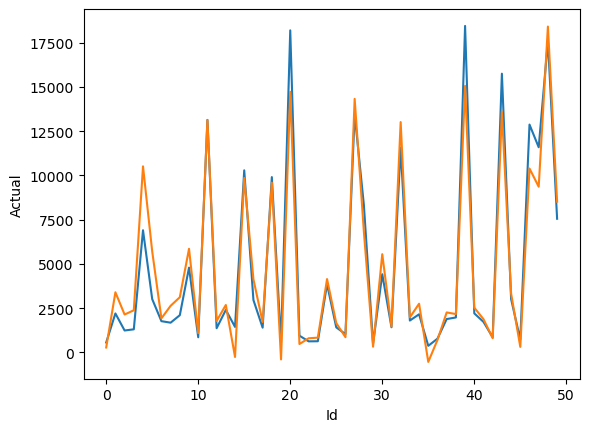

In [39]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

# Random Forest

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
reg=RandomForestRegressor()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest, default = 100
criterion=['poisson'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10]
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}  
RFC_reg = GridSearchCV(reg, parameters)
RFC_reg.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['poisson'], 'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [44]:
RFC_reg.best_params_

{'criterion': 'poisson', 'max_depth': 10, 'n_estimators': 200}

In [45]:
reg=RandomForestRegressor(n_estimators=125,criterion='squared_error',max_depth=5)

In [46]:
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=125)

In [47]:
y_pred=reg.predict(x_test)
y_pred

array([  584.49222937,  2477.91698515,  1130.71247529, ...,
       14560.17755743,  3178.87618205,  1130.71247529])

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9372786702207174

In [49]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
#Results['km']=X_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head()

,index,Actual,Predicted,Id
0,1388,559,584.492229,0
1,50052,2201,2477.916985,1
2,41645,1238,1130.712475,2
3,42377,1304,1130.712475,3
4,17244,6901,10411.939001,4


[]

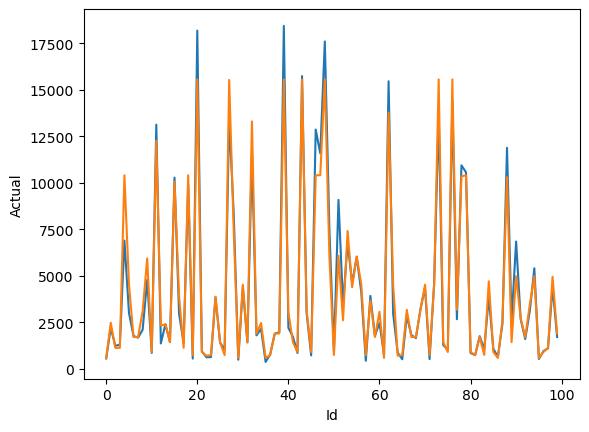

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Actual',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()